In [1]:
#from keras.wrappers.scikit_learn import KerasClassifier
from  sklearn.model_selection  import  GridSearchCV

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Activation, Flatten
#from keras.utils import np_utils

from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
dummy = './Data/DummyData3.csv'

df = pd.read_csv(dummy)

df.head()

,Unnamed: 0,Date,Event_ID,Duration,Volume,WaterClassify,EventFlowRate,meterNumber,gw,CustomerId,Month,Leak,Building Type,Square Footage,Year constructed,Climate region,Number of workers
0,0,2023-06-01 00:08:33,0,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],No,Office,"250,000",2006,Very cold/Cold,256
1,1,2023-06-01 03:24:03,1,0.0,1.851562,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],No,Office,"250,000",2006,Very cold/Cold,256
2,2,2023-06-01 08:04:32,2,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],No,Office,"250,000",2006,Very cold/Cold,256
3,3,2023-06-01 08:10:41,3,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],No,Office,"250,000",2006,Very cold/Cold,256
4,4,2023-06-01 08:23:09,4,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],No,Office,"250,000",2006,Very cold/Cold,256


In [3]:
df.shape

(1036, 17)

In [4]:
df.isnull().sum()

Unnamed: 0           0
Date                 0
Event_ID             0
Duration             0
Volume               0
WaterClassify        0
EventFlowRate        0
meterNumber          0
gw                   0
CustomerId           0
Month                0
Leak                 0
Building Type        0
Square Footage       0
Year constructed     0
Climate region       0
Number of workers    0
dtype: int64

In [5]:
#df['Leak'].fillna('LowCon', inplace=True)

In [6]:
#df.isnull().sum()

In [7]:
from datetime import datetime

current_year = datetime.now().year
df.loc[:, 'BuildAge'] = current_year - df['Year constructed'] - 1
df.drop('Year constructed', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)
df.drop('Month', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

df['Square Footage'] = df['Square Footage'].str.replace(',', '').astype(int)

df.head()

,Event_ID,Duration,Volume,WaterClassify,EventFlowRate,meterNumber,gw,CustomerId,Leak,Building Type,Square Footage,Climate region,Number of workers,BuildAge
0,0,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,No,Office,250000,Very cold/Cold,256,17
1,1,0.0,1.851562,LowCon,0.0,19240566,b827eb5e5925,10849,No,Office,250000,Very cold/Cold,256,17
2,2,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,No,Office,250000,Very cold/Cold,256,17
3,3,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,No,Office,250000,Very cold/Cold,256,17
4,4,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,No,Office,250000,Very cold/Cold,256,17


In [8]:
encode = ['WaterClassify', 'meterNumber', 'gw','CustomerId','Building Type','Climate region']

df = pd.get_dummies(df, columns=encode)

df.head()

,Event_ID,Duration,Volume,EventFlowRate,Leak,Square Footage,Number of workers,BuildAge,WaterClassify_HighCon,WaterClassify_LowCon,WaterClassify_MedCon,WaterClassify_Outliers,meterNumber_19240566,gw_b827eb5e5925,gw_b827eb5e5926,CustomerId_10849,Building Type_Office,Climate region_Very cold/Cold
0,0,0.0,0.265625,0.0,No,250000,256,17,0,1,0,0,1,1,0,1,1,1
1,1,0.0,1.851562,0.0,No,250000,256,17,0,1,0,0,1,1,0,1,1,1
2,2,0.0,0.265625,0.0,No,250000,256,17,0,1,0,0,1,1,0,1,1,1
3,3,0.0,0.000000,0.0,No,250000,256,17,0,1,0,0,1,1,0,1,1,1
4,4,0.0,0.000000,0.0,No,250000,256,17,0,1,0,0,1,1,0,1,1,1


In [9]:
feature_cols = ['Duration','Volume','EventFlowRate','Square Footage',
                'Number of workers','BuildAge','WaterClassify_HighCon','WaterClassify_LowCon',
                'WaterClassify_MedCon','WaterClassify_Outliers','meterNumber_19240566',
                'gw_b827eb5e5925','gw_b827eb5e5926','CustomerId_10849','Building Type_Office',
                'Climate region_Very cold/Cold']

X = df[feature_cols]

X

,Duration,Volume,EventFlowRate,Square Footage,Number of workers,BuildAge,WaterClassify_HighCon,WaterClassify_LowCon,WaterClassify_MedCon,WaterClassify_Outliers,meterNumber_19240566,gw_b827eb5e5925,gw_b827eb5e5926,CustomerId_10849,Building Type_Office,Climate region_Very cold/Cold
0,0.0,0.265625,0.0,250000,256,17,0,1,0,0,1,1,0,1,1,1
1,0.0,1.851562,0.0,250000,256,17,0,1,0,0,1,1,0,1,1,1
2,0.0,0.265625,0.0,250000,256,17,0,1,0,0,1,1,0,1,1,1
3,0.0,0.000000,0.0,250000,256,17,0,1,0,0,1,1,0,1,1,1
4,0.0,0.000000,0.0,250000,256,17,0,1,0,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,0.0,0.000000,0.0,250000,256,17,0,1,0,0,1,1,0,1,1,1
1032,0.0,0.000000,0.0,250000,256,17,0,1,0,0,1,1,0,1,1,1
1033,0.0,0.000000,0.0,250000,256,17,0,1,0,0,1,1,0,1,1,1
1034,0.0,0.000000,0.0,250000,256,17,0,1,0,0,1,1,0,1,1,1


In [10]:
y = df['Leak']

y

0       No
1       No
2       No
3       No
4       No
        ..
1031    No
1032    No
1033    No
1034    No
1035    No
Name: Leak, Length: 1036, dtype: object

In [11]:
leaks = df['Leak'].value_counts()
print(leaks)

No     807
Yes    229
Name: Leak, dtype: int64


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [13]:
# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,j) for i in range(1,9) for j in range(1,9)]                    

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation='logistic', solver='adam', 
                                         alpha=1e-5, random_state=1, 
                                         learning_rate_init = 0.6, max_iter=400)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X_train, y_train)

# view the results:
# print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

{'hidden_layer_sizes': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)]} 

0.7753746694093447
{'hidden_layer_sizes': (1, 1)}


In [14]:
my_ANN = MLPClassifier(hidden_layer_sizes=(1,1), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1, max_iter=400)

my_ANN.fit(X_train, y_train)
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.7932692307692307


In [15]:
y_predict_prob_ann = my_ANN.predict_proba(X_test)
print(y_predict_ann,'\n')
print(y_predict_prob_ann)

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_ann[:,1], pos_label='Yes')

print(fpr)
print("\n\n\n")
print(tpr)

[0. 1.]




[0. 1.]


In [17]:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.5


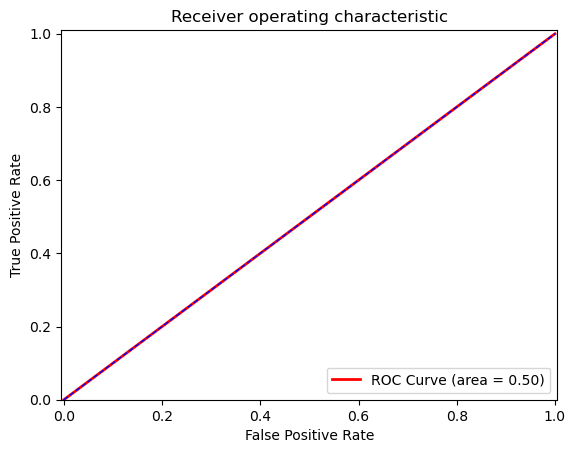

In [18]:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [19]:
results = pd.DataFrame()

results['actual'] = y_test 
results['prediction'] = y_predict_ann

pd.set_option('display.max_rows', None)
print(results)

     actual prediction
782      No         No
536     Yes         No
287      No         No
251      No         No
920      No         No
735      No         No
223      No         No
437      No         No
71       No         No
66       No         No
617     Yes         No
957      No         No
391      No         No
213      No         No
158      No         No
463      No         No
267      No         No
521     Yes         No
859      No         No
988      No         No
837      No         No
659     Yes         No
814      No         No
199      No         No
773      No         No
832      No         No
402     Yes         No
593     Yes         No
860      No         No
996      No         No
511     Yes         No
193      No         No
513     Yes         No
639     Yes         No
452      No         No
519     Yes         No
273      No         No
322      No         No
209      No         No
68       No         No
577     Yes         No
67       No         No
644     Yes

In [20]:
pd.reset_option('display.max_rows')

In [149]:
wc = './Data/WatreClassifyDataFrame.csv'

dfw = pd.read_csv(wc)

dfw.head()

,Unnamed: 0,Date,Event_ID,Duration,Volume,WaterClassify,EventFlowRate,meterNumber,gw,CustomerId,Month
0,0,2023-06-01 00:08:33,0,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06']
1,1,2023-06-01 03:24:03,1,0.0,1.851562,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06']
2,2,2023-06-01 08:04:32,2,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06']
3,3,2023-06-01 08:10:41,3,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06']
4,4,2023-06-01 08:23:09,4,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06']


In [150]:
dfw.drop('Date', axis=1, inplace=True)
dfw.drop('Month', axis=1, inplace=True)
dfw.drop('Event_ID', axis=1, inplace=True)
dfw.drop('Unnamed: 0', axis=1, inplace=True)

dfw.head()

,Duration,Volume,WaterClassify,EventFlowRate,meterNumber,gw,CustomerId
0,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849
1,0.0,1.851562,LowCon,0.0,19240566,b827eb5e5925,10849
2,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849
3,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849
4,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849


In [151]:
encode = ['meterNumber', 'gw','CustomerId']

dfw = pd.get_dummies(dfw, columns=encode)

dfw.head()

,Duration,Volume,WaterClassify,EventFlowRate,meterNumber_19240566,gw_b827eb5e5925,CustomerId_10849
0,0.0,0.265625,LowCon,0.0,1,1,1
1,0.0,1.851562,LowCon,0.0,1,1,1
2,0.0,0.265625,LowCon,0.0,1,1,1
3,0.0,0.000000,LowCon,0.0,1,1,1
4,0.0,0.000000,LowCon,0.0,1,1,1


In [152]:
feature_cols = ['Duration','Volume','EventFlowRate','meterNumber_19240566','gw_b827eb5e5925','CustomerId_10849']

X = dfw[feature_cols]

X

,Duration,Volume,EventFlowRate,meterNumber_19240566,gw_b827eb5e5925,CustomerId_10849
0,0.0,0.265625,0.0,1,1,1
1,0.0,1.851562,0.0,1,1,1
2,0.0,0.265625,0.0,1,1,1
3,0.0,0.000000,0.0,1,1,1
4,0.0,0.000000,0.0,1,1,1
...,...,...,...,...,...,...
1027,0.0,0.000000,0.0,1,1,1
1028,0.0,0.000000,0.0,1,1,1
1029,0.0,0.000000,0.0,1,1,1
1030,0.0,0.000000,0.0,1,1,1


In [153]:
y = dfw['WaterClassify']

y

0       LowCon
1       LowCon
2       LowCon
3       LowCon
4       LowCon
         ...  
1027    LowCon
1028    LowCon
1029    LowCon
1030    LowCon
1031    LowCon
Name: WaterClassify, Length: 1032, dtype: object

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [155]:
# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,j) for i in range(1,9) for j in range(1,9)]                    

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation='logistic', solver='adam', 
                                         alpha=1e-5, random_state=1, 
                                         learning_rate_init = 0.1, max_iter=400)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X_train, y_train)

# view the results:
# print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

{'hidden_layer_sizes': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)]} 



/Users/macbookpro/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.9963708492506612
{'hidden_layer_sizes': (2, 2)}


In [156]:
my_ANN = MLPClassifier(hidden_layer_sizes=(2,2), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1, max_iter=400)

my_ANN.fit(X_train, y_train)
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.9951690821256038


In [157]:
y_predict_prob_ann = my_ANN.predict_proba(X_test)
print(y_predict_ann,'\n')
print(y_predict_prob_ann)

['LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'MedCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowC

In [158]:
results = pd.DataFrame()

results['actual'] = y_test 
results['prediction'] = y_predict_ann

pd.set_option('display.max_rows', None)
print(results)

       actual prediction
456    LowCon     LowCon
990    LowCon     LowCon
811    LowCon     LowCon
581    LowCon     LowCon
549    LowCon     LowCon
312    LowCon     LowCon
436    LowCon     LowCon
476    LowCon     LowCon
612    LowCon     LowCon
653    LowCon     LowCon
943    LowCon     LowCon
67     LowCon     LowCon
473    LowCon     LowCon
817    LowCon     LowCon
437    LowCon     LowCon
471    LowCon     LowCon
397    LowCon     LowCon
621    LowCon     LowCon
143    LowCon     LowCon
197    LowCon     LowCon
515    LowCon     LowCon
589    LowCon     LowCon
542    LowCon     LowCon
802    LowCon     LowCon
322    LowCon     LowCon
742    LowCon     LowCon
702    LowCon     LowCon
597    LowCon     LowCon
194    LowCon     LowCon
729    LowCon     LowCon
391    LowCon     LowCon
600    LowCon     LowCon
192    MedCon     MedCon
71     LowCon     LowCon
459    LowCon     LowCon
68     LowCon     LowCon
213    LowCon     LowCon
565    LowCon     LowCon
752    LowCon     LowCon


In [159]:
pd.reset_option('display.max_rows')